In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png
from bokeh.io.export import get_screenshot_as_png

from bokeh.plotting import figure, output_file, show
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

import matplotlib.pyplot as plt

cmap = cm.get_cmap('YlOrBr')

In [2]:
stopwords = set(STOPWORDS)

### Gracias a analisis previos (En el analisis por ubicacion), sabemos que los paises con mas tweets son Estados Unidos, Reino Unido, Canada, Australia e india. 
### Grafico cuales son las palabras mas nombradas en dichos paises.

In [3]:
def generar_palabras(pais):
    tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')
    ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')
    la_ciudad_es_del_pais = ciudades.loc[:, 'country'].str.contains(pais, regex = False)
    ciudades_del_pais = ciudades.loc[la_ciudad_es_del_pais]
    ciudades_del_pais = ciudades_del_pais.reset_index(drop = True)
    tweets_pais = pd.DataFrame()
    tweets_aux = pd.DataFrame()
    tweet_es_de_la_ciudad = pd.DataFrame()
    
    for x in range(ciudades_del_pais['city_ascii'].count()):

        ciudad = ciudades_del_pais.loc[x, 'city_ascii']
        if len(ciudad) > 4:
            tweet_es_de_la_ciudad = tweets.loc[:, 'location'].str.contains(ciudad, regex = False, na=False)
        else:
            tweet_es_de_la_ciudad = (tweets.loc[:, 'location'] == ciudad)

        tweets_aux = tweets.loc[tweet_es_de_la_ciudad]

        frames = [tweets_aux, tweets_pais]

        tweets_pais = pd.concat(frames)

    tweets_pais = tweets_pais.reset_index(drop = True)
    tweets_pais['palabras'] = tweets_pais['text'].str.split()
    palabras = tweets_pais['palabras'].explode()
    palabras = palabras.str.lower()
                     

    palabras_limpias = []
    
    for palabra in palabras:#saco caracteres especiales
        palabra_limpia = re.sub('[^A-Za-z0-9]+','', palabra)
        palabras_limpias.append(palabra_limpia)
        
    palabras = [] 
    for w in palabras_limpias: 
        if w not in stopwords: 
            palabras.append(w) 
    
    palabras = pd.Series(palabras)

    return (palabras)

##  Canada

#### Grafico palabras mas usadas en Canada

In [4]:
palabras = pd.DataFrame()

In [5]:
palabras ['palabra'] = generar_palabras("Canada")

#### agrupo

In [6]:
palabras = palabras.groupby(palabras.columns.tolist(),as_index=False).size()

#### Voy a graficar las primeras 10 palabras

In [7]:
palabras.sort_values(ascending = False, inplace = True)
palabras.head(10)

palabra
             56
emergency    13
new          11
one          10
us            9
injuries      9
mudslide      9
now           9
last          8
fire          8
dtype: int64

#### Dropeo el espacio en blanco.

In [8]:
palabras = palabras.drop(labels =[""])
palabras.head(10)

palabra
emergency    13
new          11
one          10
us            9
injuries      9
mudslide      9
now           9
last          8
fire          8
fires         8
dtype: int64

#### Filtro y me quedo con los primeros 10

In [9]:
palabras = palabras.head(10)
palabras

palabra
emergency    13
new          11
one          10
us            9
injuries      9
mudslide      9
now           9
last          8
fire          8
fires         8
dtype: int64

Text(0.5, 1.0, 'Diez palabras mas usadas en Canada')

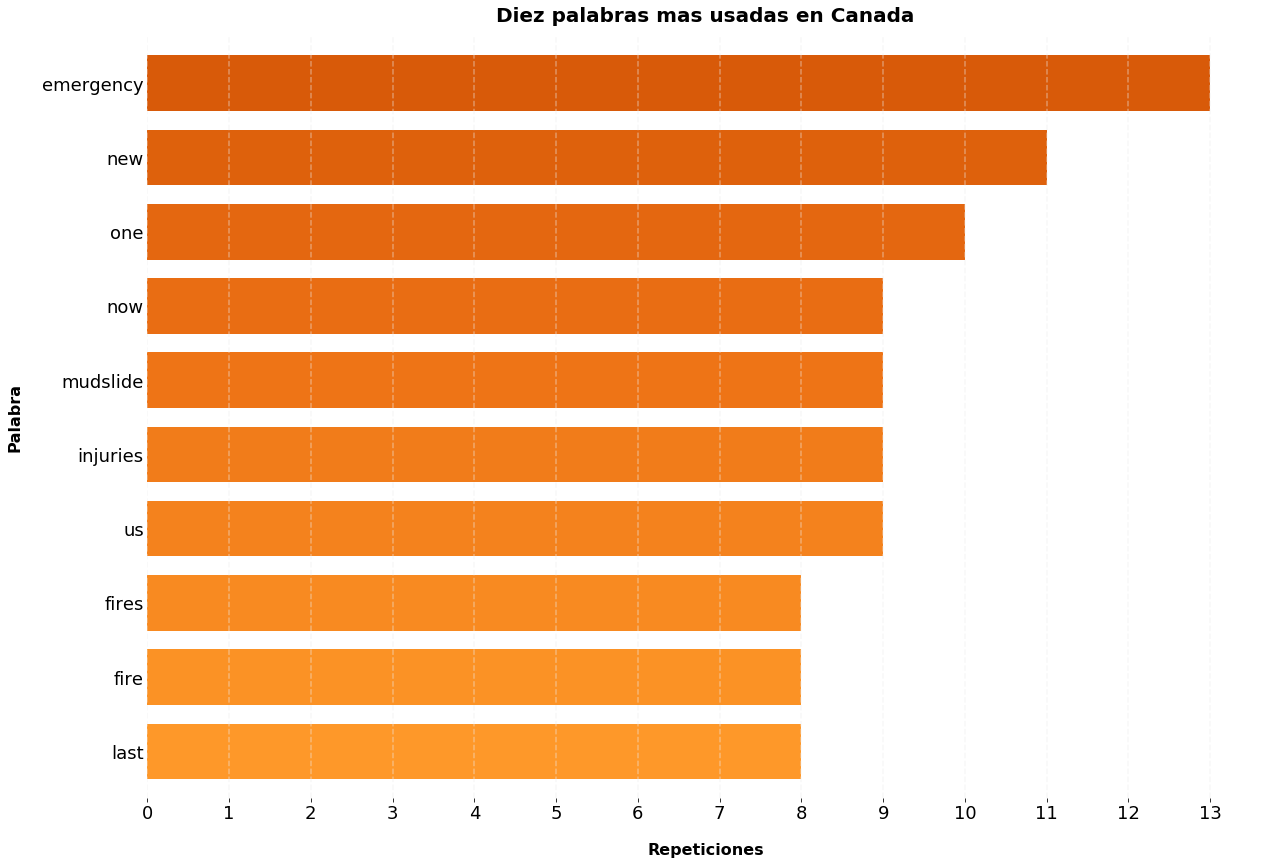

In [10]:
saltos = np.linspace(0.5, 0.7, 10)
colores = cmap(saltos)

maximo = palabras.max()

grafico = palabras.sort_values().plot(kind='barh', figsize=(20,14), color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 1))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Diez palabras mas usadas en Canada", weight='bold', size=20, pad=15)

### Grafico el cloud

In [11]:
palabras = generar_palabras("Canada").to_string()

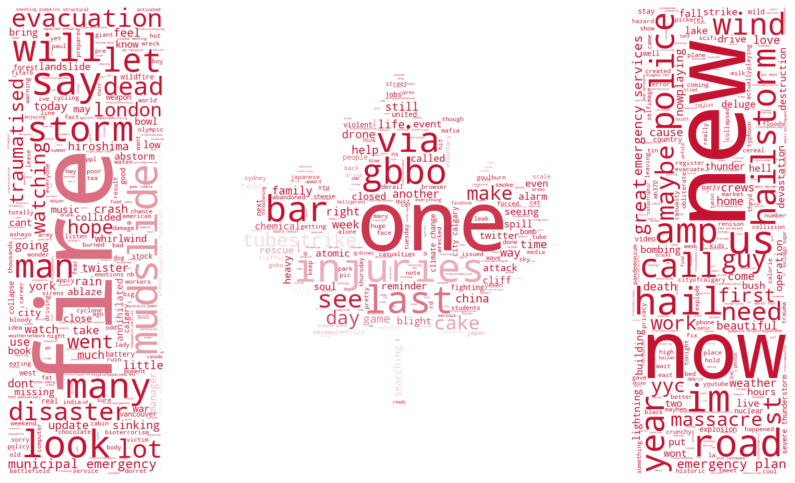

In [12]:

mask = np.array(Image.open("imagenes/Canada.jpg"))
wordcloud_bandera = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/CanadaCloud.png", format="png")

plt.show()

### Ahora hago lo mismo con Estados Unidos

In [13]:
palabras = pd.DataFrame()
palabras ['palabra'] = generar_palabras("United States")

In [14]:
palabras = palabras.groupby(palabras.columns.tolist(),as_index=False).size()

In [15]:
palabras.sort_values(ascending = False, inplace = True)
palabras = palabras.drop(labels =[""])
palabras.head(10)

palabra
fire         268
new          245
emergency    236
via          195
amp          188
will         178
now          163
im           158
train        141
people       138
dtype: int64

In [16]:
palabras = palabras.head(10)

Text(0.5, 1.0, 'Diez palabras mas usadas en Estados Unidos')

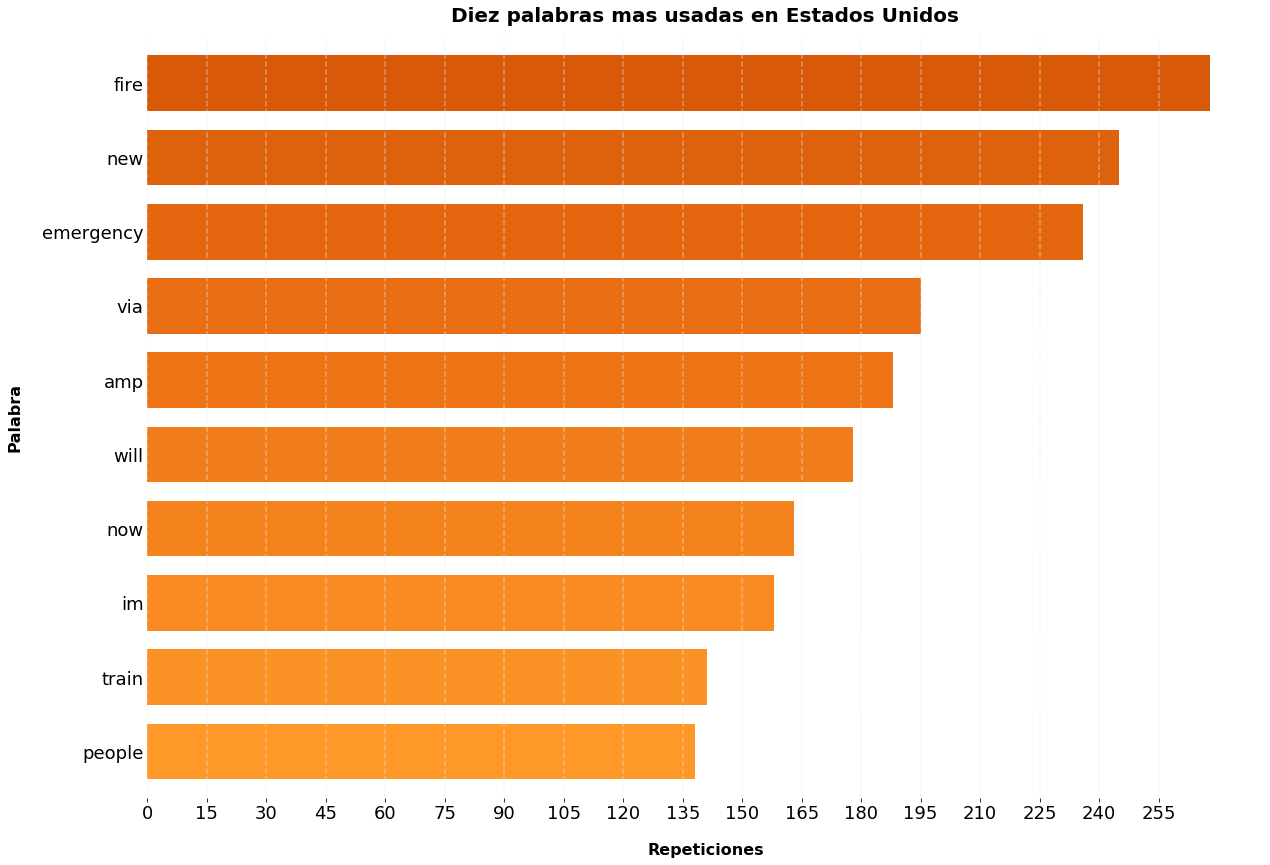

In [17]:
saltos = np.linspace(0.5, 0.7, 10)
colores = cmap(saltos)

maximo = palabras.max()

grafico = palabras.sort_values().plot(kind='barh', figsize=(20,14), color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 15))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Diez palabras mas usadas en Estados Unidos", weight='bold', size=20, pad=15)

In [18]:
palabras = generar_palabras("United States").to_string()

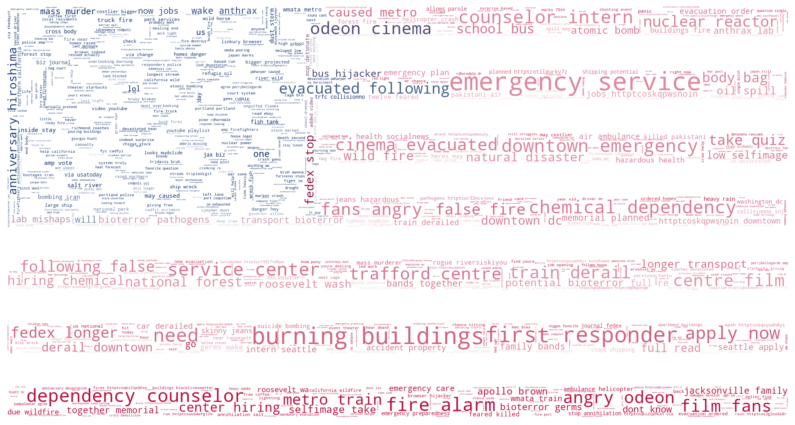

In [19]:

mask = np.array(Image.open("imagenes/EEUU.png"))
wordcloud_bandera = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/EEUUCloud.png", format="png")

plt.show()

### Ahora Reino Unido

In [20]:
palabras = pd.DataFrame()
palabras ['palabra'] = generar_palabras("United Kingdom")

In [21]:
palabras = palabras.groupby(palabras.columns.tolist(),as_index=False).size()
palabras.sort_values(ascending = False, inplace = True)
palabras = palabras.drop(labels =[""])
palabras.head(10)

palabra
will           17
mudslide       15
im             13
now            12
new            12
fire           12
gbbo           10
people         10
dont           10
traumatised     9
dtype: int64

In [22]:
palabras = palabras.head(10)

Text(0.5, 1.0, 'Diez palabras mas usadas en El Reino Unido')

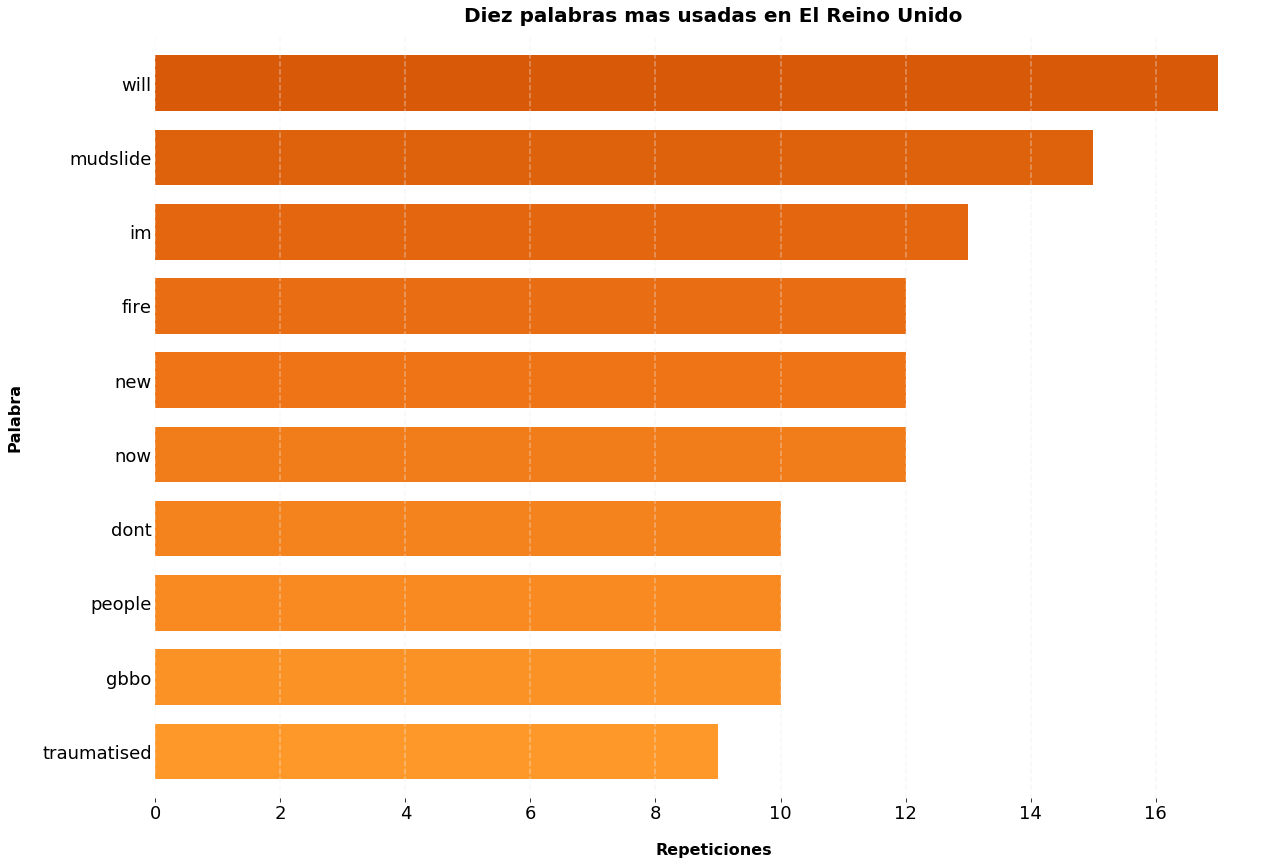

In [23]:
saltos = np.linspace(0.5, 0.7, 10)
colores = cmap(saltos)

maximo = palabras.max()

grafico = palabras.sort_values().plot(kind='barh', figsize=(20,14), color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 2))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Diez palabras mas usadas en El Reino Unido", weight='bold', size=20, pad=15)

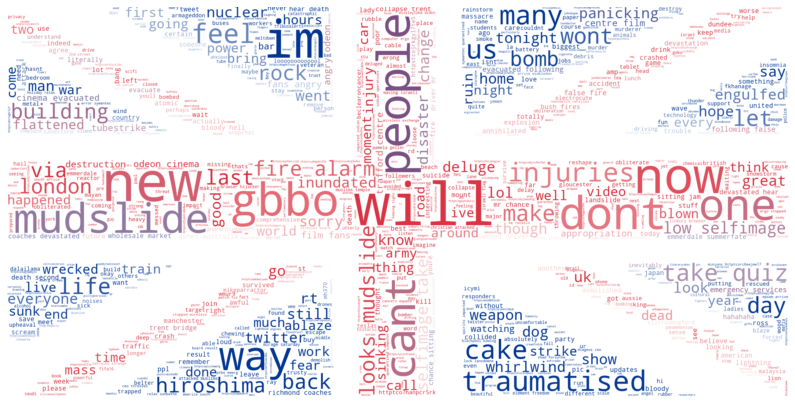

In [24]:
palabras = generar_palabras("United Kingdom").to_string()

mask = np.array(Image.open("imagenes/UK.jpg"))
wordcloud_bandera = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/UKCloud.png", format="png")

plt.show()

### Australia

In [25]:
palabras = pd.DataFrame()
palabras ['palabra'] = generar_palabras("Australia")
palabras = palabras.groupby(palabras.columns.tolist(),as_index=False).size()
palabras.sort_values(ascending = False, inplace = True)
palabras = palabras.drop(labels =[""])
palabras.head(10)

palabra
fire          14
im            12
amp            8
emergency      7
foxtrot        6
new            6
evacuation     6
5              6
burning        5
fwy            5
dtype: int64

In [26]:
palabras = palabras.head(10)

Text(0.5, 1.0, 'Diez palabras mas usadas en Australia')

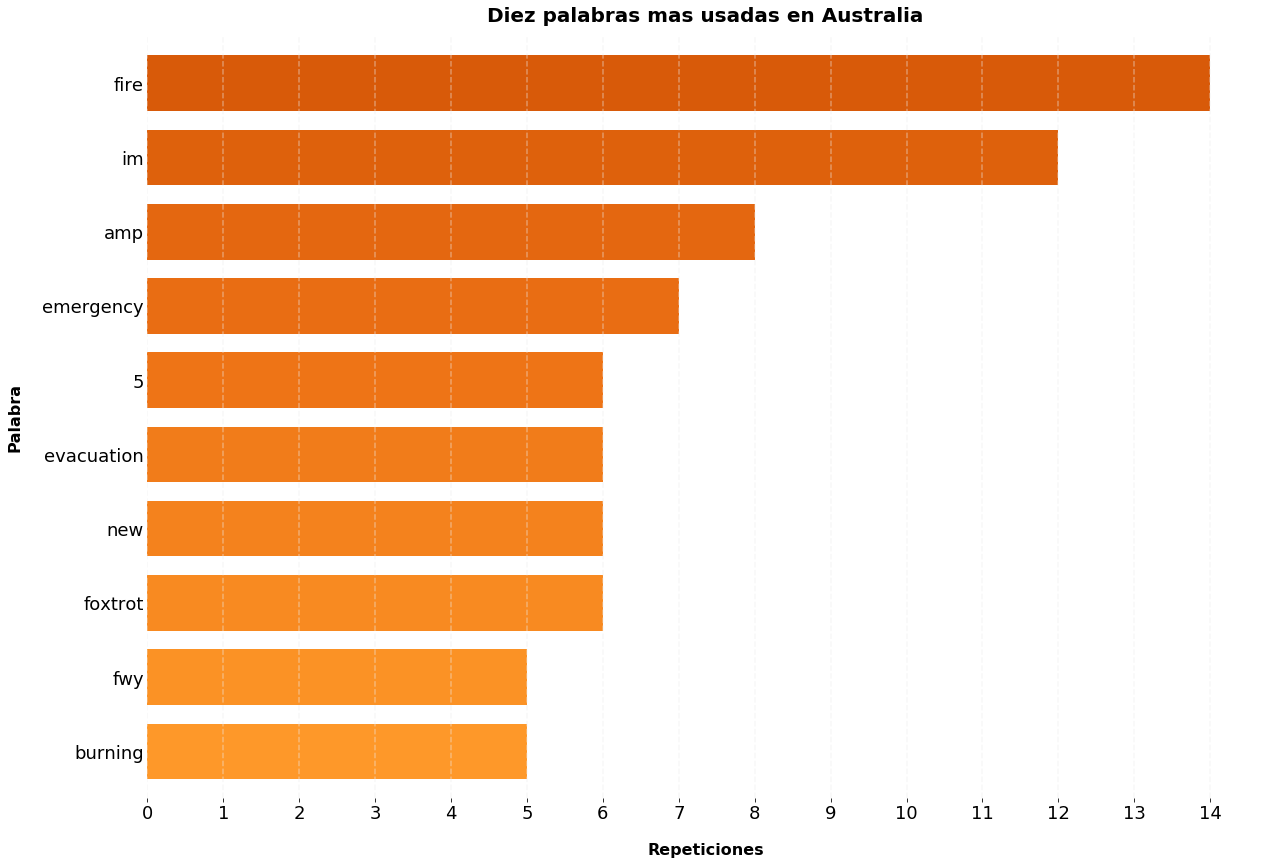

In [27]:
saltos = np.linspace(0.5, 0.7, 10)
colores = cmap(saltos)

maximo = palabras.max()

grafico = palabras.sort_values().plot(kind='barh', figsize=(20,14), color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 1))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Diez palabras mas usadas en Australia", weight='bold', size=20, pad=15)

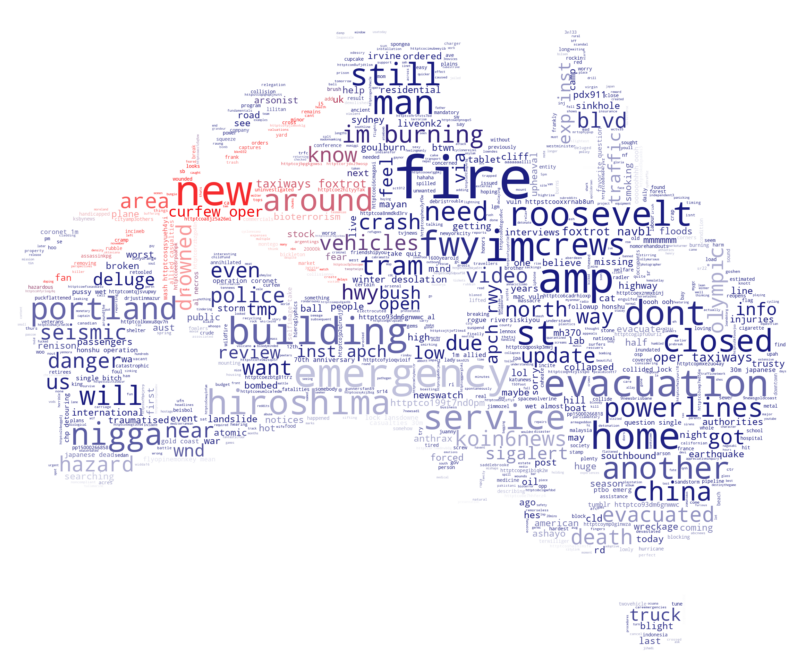

In [28]:
palabras = generar_palabras("Australia").to_string()

mask = np.array(Image.open("imagenes/Australia.jpg"))
wordcloud_bandera = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/AustraliaCloud.png", format="png")

plt.show()

### India

In [29]:
palabras = pd.DataFrame()
palabras ['palabra'] = generar_palabras("India")
palabras = palabras.groupby(palabras.columns.tolist(),as_index=False).size()
palabras.sort_values(ascending = False, inplace = True)
palabras = palabras.drop(labels =[""])
palabras.head(10)

palabra
wreckage         13
pm               13
malaysia         13
mh370            13
conclusively     13
confirmed        13
families         12
investigators    12
derailment        8
bridge            7
dtype: int64

In [30]:
palabras = palabras.head(10)

Text(0.5, 1.0, 'Diez palabras mas usadas en India')

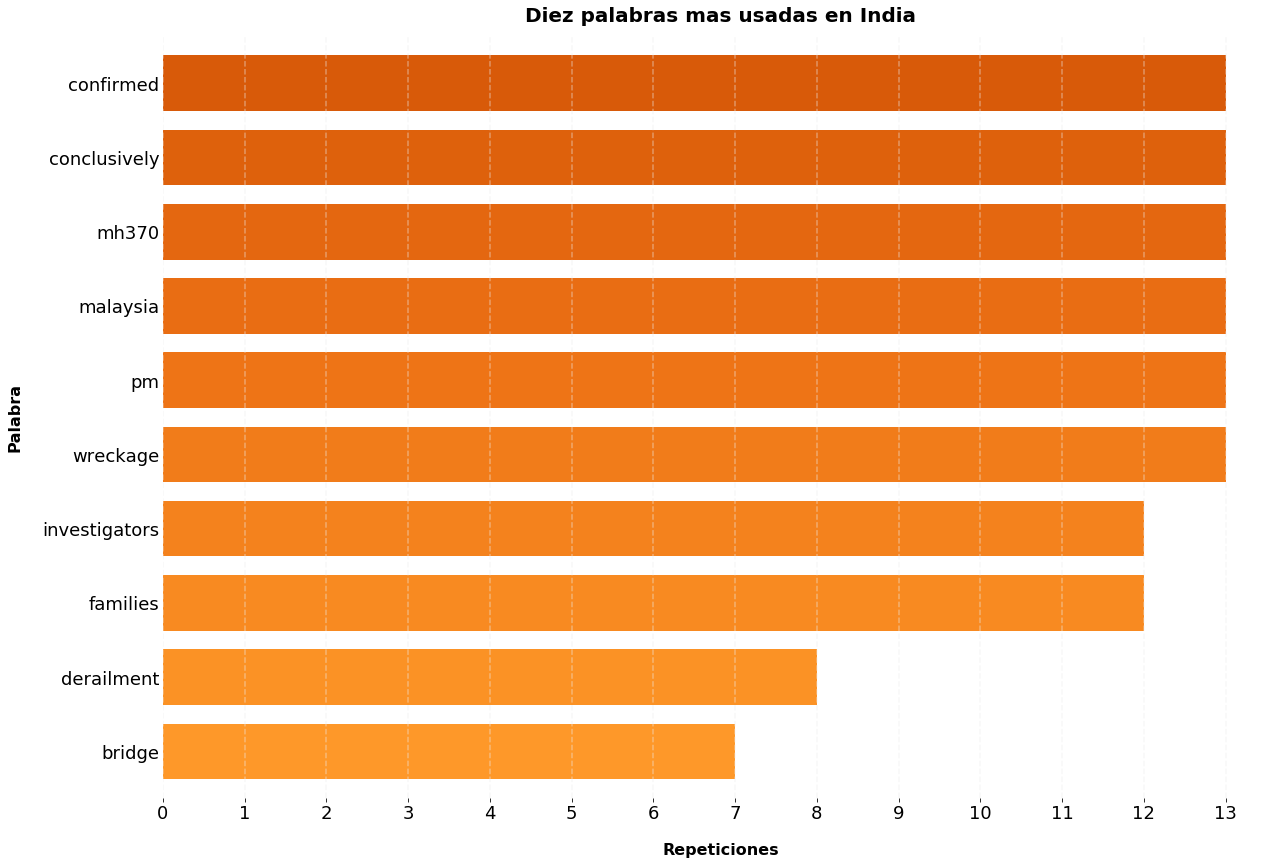

In [31]:
saltos = np.linspace(0.5, 0.7, 10)
colores = cmap(saltos)

maximo = palabras.max()

grafico = palabras.sort_values().plot(kind='barh', figsize=(20,14), color=colores, width=0.75, fontsize = 18)

plt.xticks(np.arange(0, maximo+1, 1))
plt.tick_params(axis='y', length=0)

grafico.spines['right'].set_visible(False)
grafico.spines['top'].set_visible(False)
grafico.spines['left'].set_visible(False)
grafico.spines['bottom'].set_visible(False)

lineas = grafico.get_xticks()
for i in lineas:
      grafico.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
grafico.set_xlabel("Repeticiones", labelpad=20, weight='bold', size=16)
grafico.set_ylabel("Palabra", labelpad=20, weight='bold', size=16)

plt.title("Diez palabras mas usadas en India", weight='bold', size=20, pad=15)

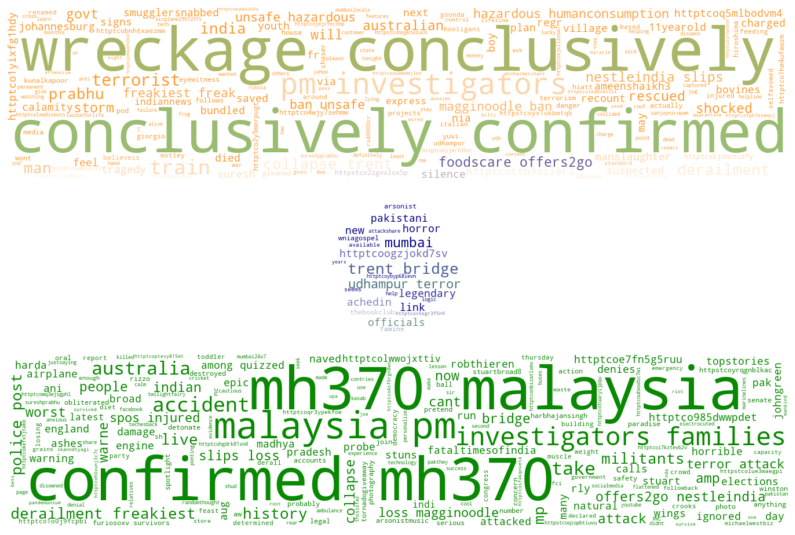

In [32]:
palabras = generar_palabras("India").to_string()

mask = np.array(Image.open("imagenes/India.png"))
wordcloud_bandera = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_bandera.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("imagenes/IndiaCloud.png", format="png")

plt.show()